In [1]:
import numpy as np
import cv2
import skimage.io 
import skimage.color
#Import necessary functions
from planarH import computeH_ransac,computeH_ransac_adaptive, warped, compositeH, computeH_norm
from matchPics import matchPics
from matplotlib import pyplot as plt

In [2]:
#Write script for Q11
cv_cover = cv2.imread('../data/cv_cover.jpg')
cv_desk = cv2.imread('../data/cv_desk.png')
cv_harry = cv2.imread('../data/hp_cover.jpg')

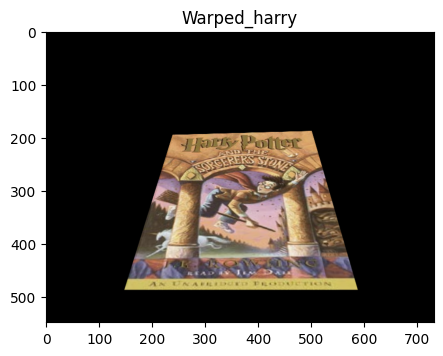

(548, 731, 3)
(548, 731, 3)
(548, 731, 3)


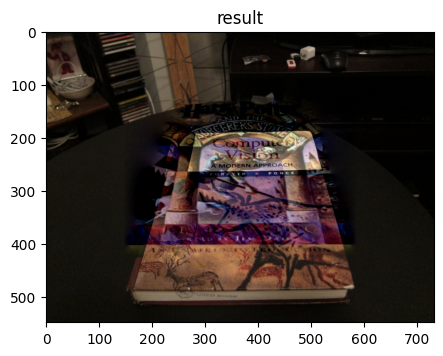

In [3]:
# Load images
# Detect keypoints and extract descriptors
# Load images
# Detect keypoints and extract descriptors
orb = cv2.ORB_create(nfeatures=40000,
    scaleFactor=1.2,
    nlevels=8,
    edgeThreshold=31,
    firstLevel=0,
    WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE,
    patchSize=31,
    fastThreshold=20,)

kp1, des1 = orb.detectAndCompute(cv_cover, None)
kp2, des2 = orb.detectAndCompute(cv_desk, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches_cv = bf.match(des1, des2)

# Sort matches by distance
matches_cv = sorted(matches_cv, key=lambda x: x.distance)

# Select the top 10% accurate matches

num_matches = int(len(matches_cv) * 0.5)  # choose 10% of total matches
best_matches = matches_cv[:num_matches]

pts1_best = np.float32([kp1[m.queryIdx].pt for m in best_matches]).reshape(-1, 2)
pts2_best = np.float32([kp2[m.trainIdx].pt for m in best_matches]).reshape(-1, 2)

H2to1, inliers = computeH_ransac_adaptive(pts2_best, pts1_best, 300, 2)

H2to1_norm = computeH_norm(pts2_best[inliers], pts1_best[inliers])

h, w = cv_desk.shape[:2]

resized_harry = cv2.resize(cv_harry, dsize=(cv_cover.shape[1], cv_cover.shape[0]), interpolation=cv2.INTER_AREA)

warped_harry = cv2.warpPerspective(resized_harry, H2to1, (w, h))
warped_harry = cv2.cvtColor(warped_harry, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(warped_harry)
plt.title('Warped_harry')
plt.show()

result = warped(H2to1, resized_harry, cv_desk)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(result)
plt.title('result')
plt.show()